In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

teams = pd.read_csv('Team Stats.csv', index_col=0)
winners = pd.read_csv('SB Winners.csv')

In [2]:
teams['Won'] = 0

for i in winners.index:
    teams.loc[(teams['Season'] == winners.loc[i, 'Season']) & (teams['Team'] == winners.loc[i, 'Winner']), 'Won'] = 1

In [3]:
teams

,Season,Team,W-L%,PtDif,Pass.Yds,Pass.TD,Rush.Yds,Rush.TD,Opp.Pass.Yds,Opp.Pass.TD,Opp.Rush.Yds,Opp.Rush.TD,Forced.TO,DPly,Won
Rk,,,,,,,,,,,,,,,
1,2024,BUF,0.765,157,3875,30,2230,32,3843,28,1963,13,32,1052,0
2,2024,DEN,0.588,114,3610,30,1908,12,3752,22,1639,10,25,1093,0
3,2024,DET,0.882,222,4474,39,2488,29,4148,18,1672,18,24,1016,0
4,2024,GNB,0.647,122,3807,28,2496,23,3658,23,1689,13,31,1036,0
5,2024,HOU,0.588,0,3526,20,1909,15,3417,31,1938,11,29,1050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,1970,DET,0.714,145,1857,19,2127,16,2296,14,1152,7,44,756,0
617,1970,MIA,0.714,69,1957,15,2082,14,2551,17,1453,8,38,808,0
618,1970,MIN,0.857,192,2181,12,1634,16,1438,6,1365,4,44,814,0


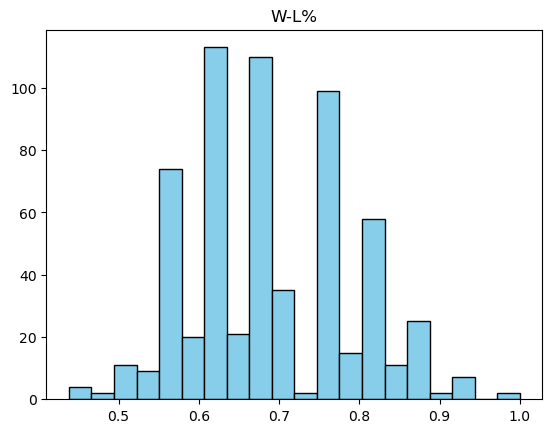

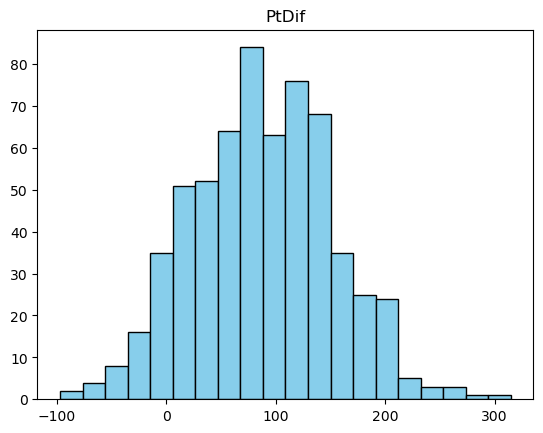

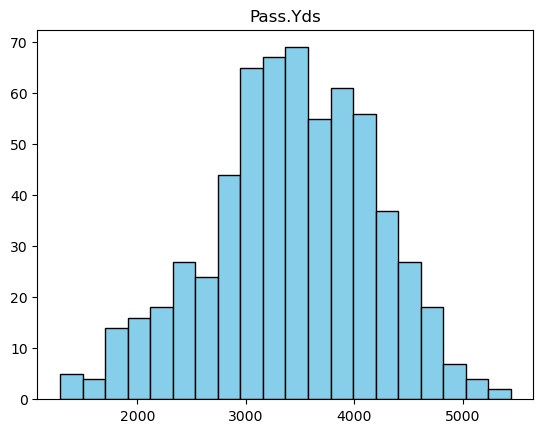

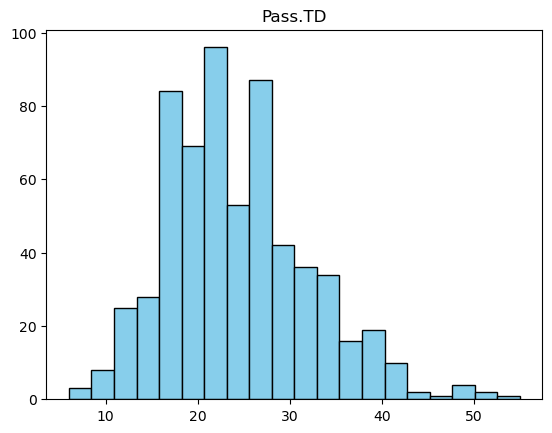

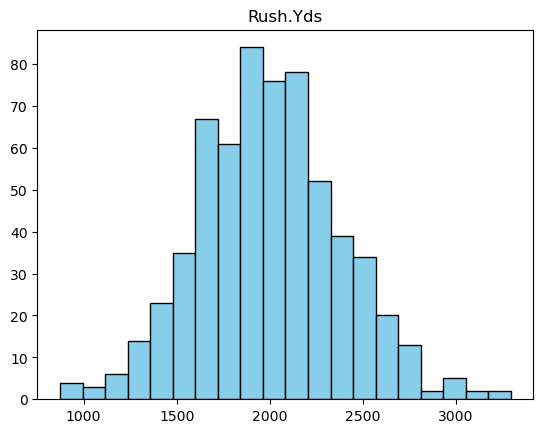

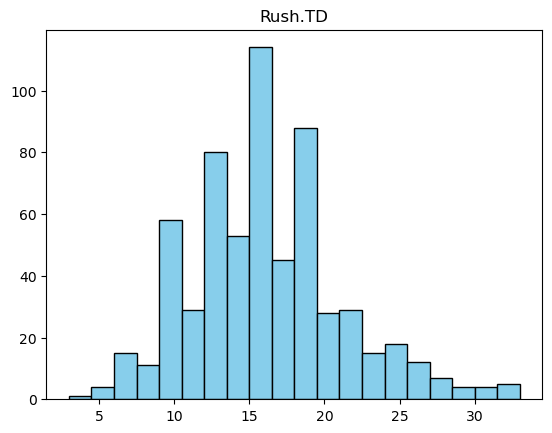

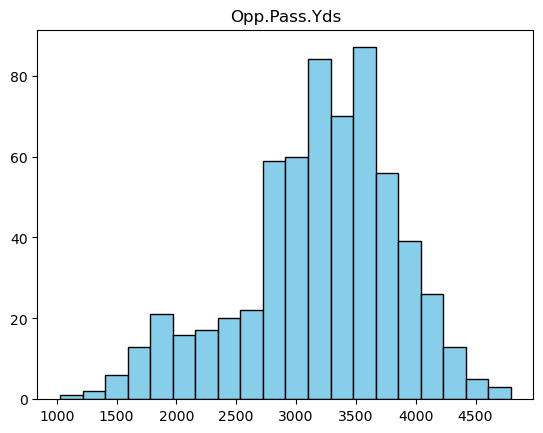

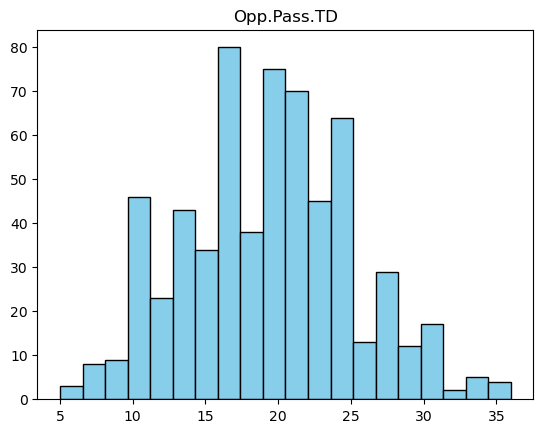

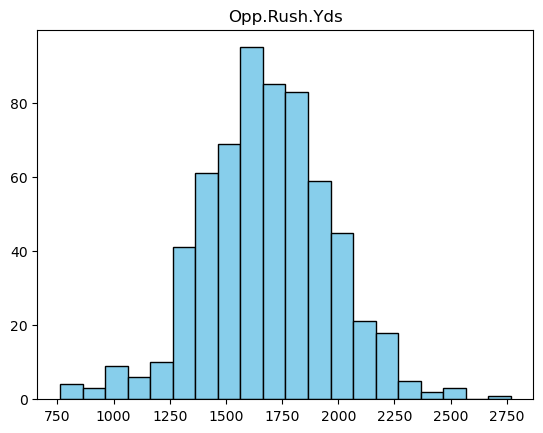

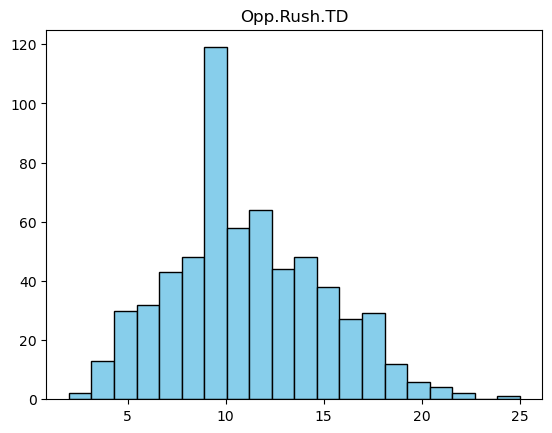

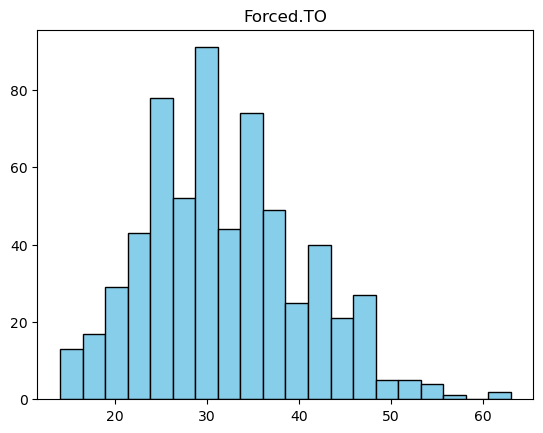

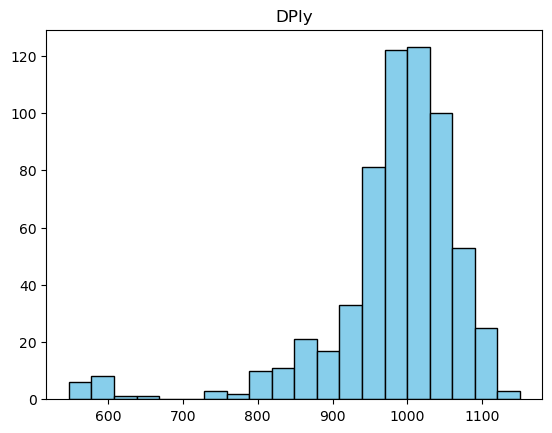

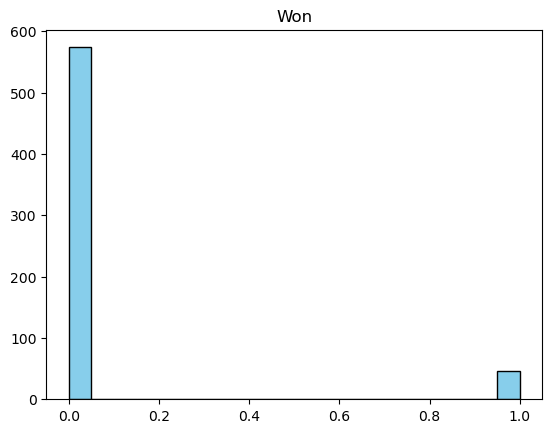

W-L% skewness: 0.23333520860901374
PtDif skewness: 0.0877478772763591
Pass.Yds skewness: -0.2488226876874806
Pass.TD skewness: 0.6210135782961703
Rush.Yds skewness: 0.16057072010471254
Rush.TD skewness: 0.5294653702134966
Opp.Pass.Yds skewness: -0.5752035516632228
Opp.Pass.TD skewness: 0.16141225133654707
Opp.Rush.Yds skewness: -0.019791049075358315
Opp.Rush.TD skewness: 0.33813638171947963
Forced.TO skewness: 0.39420901790783186
DPly skewness: -2.1923237547702854
Won skewness: 3.257254964395456


In [4]:
for i in teams.columns[2:]:
    plt.hist(teams[i], bins=20, color='skyblue', edgecolor='black')
    plt.title(i)
    plt.show()

for i in teams.columns[2:]:
    skew = teams[i].skew()
    print(f'{i} skewness: {skew}')

In [5]:
use_teams = teams.copy()

use_teams['Pass.TD'] = np.log1p(use_teams['Pass.TD'])
use_teams['Rush.TD'] = np.log1p(use_teams['Rush.TD'])
use_teams['DPly'] = np.log1p(use_teams['DPly'])
use_teams['Forced.TO'] = np.log1p(use_teams['Forced.TO'])

In [6]:
feature_columns = ['Season', 'Team', 'W-L%', 'PtDif', 'Pass.Yds', 'Pass.TD',
       'Rush.Yds', 'Rush.TD', 'Opp.Pass.Yds', 'Opp.Pass.TD', 'Opp.Rush.Yds',
       'Opp.Rush.TD', 'Forced.TO', 'DPly']

X = use_teams[feature_columns].copy()
for col in X.columns[3:]:
    X[col] = X[col].astype(float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[:,2:])
X_scaled = pd.DataFrame(X_scaled , columns=feature_columns[2:])
X_scaled.index = range(1, len(X_scaled) + 1)
X_view = X[['Season', 'Team']]
X_final = pd.concat([X_view, X_scaled], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, use_teams['Won'], test_size=0.2)
new_X_train = X_train.iloc[:,2:]
new_X_test = X_test.iloc[:,2:]

In [7]:
model = LogisticRegression(class_weight='balanced')
model.fit(new_X_train, y_train)

y_pred = model.predict(new_X_test)

check = pd.concat([X_test, y_test], axis=1)
check['preds'] = y_pred

In [ ]:
filtered_teams_list = []
for _, row in correct.iterrows():
    filtered_teams = teams[(teams['Season'] == row['Season']) & 
                           (teams['Team'] == row['Team'])]
    filtered_teams_list.append(filtered_teams)

final_filtered_teams = pd.concat(filtered_teams_list)
final_filtered_teams

In [ ]:
for i in teams.columns[3:(len(teams.columns)-1)]:
    plt.scatter(teams[i], teams['W-L%'], color='green', marker='o', s=100, alpha=0.7)
    plt.title(f'{i} vs. W-L%')
    plt.xlabel(f'{i}')
    plt.ylabel('W-L%')
    plt.show()

In [ ]:
X = use_teams[feature_columns].copy()
X = use_teams.iloc[:, 2:]
const = sm.add_constant(X)
model = sm.OLS(use_teams['W-L%'], const)
results = model.fit()

In [ ]:
print(results.summary())